<div align="center">

# Centro Latinoamericano de Excelencia en Cambio Climático y Salud de la Universidad Peruana Cayetano Heredia 
    
</div>

<img src="clima.jpeg">



## Datos públicos del CMIP6 : Ejemplo básico en python


### Este notebook muestra cómo consultar el catálogo y cargar los datos utilizando python

#### En esta seccion instalar todos los paquetes abajo mencionados 

#### GCSFS - Conecta con Google Cloud Storage

#### Xarray - Introduce etiquetas en forma de dimensiones

In [1]:
#!pip install --upgrade  xarray zarr gcsfs cftime nc-time-axis 
#!apt-get -qq install python-cartopy python3-cartopy;
#!pip uninstall -y shapely;    # cartopy and shapely aren't friends (early 2020)
#!pip install shapely --no-binary shapely;
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shpreader
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import cartopy
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
fig = plt.figure(figsize=(15, 8))
from cartopy.feature import NaturalEarthFeature

<Figure size 1080x576 with 0 Axes>

# modelos

<img src="modelos.jpeg">

### Navegar por el catálogo
#### Los datos del catálogo se almacenan en un archivo CSV. Aquí lo leemos con Pandas.

Las columnas del marco de datos corresponden al vocabulario controlado CMIP6. Una guía para principiantes sobre estos términos está disponible en este documento. (https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q) Aquí, filtramos los datos para encontrar la temperatura mensual del aire en superficie (tas) (amon=Monthly Mean Atmospheric) para los experimentos históricos de 1880-01 a 2014-12.

In [2]:
lista_de_modelos = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
modelos=lista_de_modelos.query("table_id=='Amon' | table_id=='fx'" )

In [3]:
lista_de_modelos

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,evspsbl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,vas,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,6hrPlev,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
505059,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,prc,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
505060,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,sfcWind,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
505061,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
505062,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,vas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624


In [4]:
modelos

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,evspsbl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,vas,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
5,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
505059,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,prc,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
505060,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,sfcWind,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
505061,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
505062,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,vas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624


### Vamos a cargar datos de dos modelos! 

NESM3 - The Nanjing University of Information Science and Technology Earth System Model version 3 (NESM v3).

GFDL-ESM4- Geophysical Fluid Dynamics Laboratory ( GFDL) GFDL-ESM4 model

In [5]:
parametros1="experiment_id == 'ssp245' & source_id == 'NESM3' & variable_id == 'tas'"
modelo_tas1 = modelos.query(parametros1)
modelo_tas1

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
239601,ScenarioMIP,NUIST,NESM3,ssp245,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NUIST/NESM3/ssp24...,NaN,20190731
239736,ScenarioMIP,NUIST,NESM3,ssp245,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NUIST/NESM3/ssp24...,NaN,20190731


In [6]:
parametros2="experiment_id == 'ssp245' & source_id == 'GFDL-ESM4' & variable_id == 'tas'"
modelo_tas2 = modelos.query(parametros2)
modelo_tas2

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
17740,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
18164,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r2i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
18232,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r3i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


### Carga de datos
#### Ahora vamos a cargar un único almacenamiento utilizando gcsfs, zarr y xarray.

In [7]:
#Usaremos para el primer modelo NESM3

# esto sólo tiene que ser creado una vez
gcs = gcsfs.GCSFileSystem(token='anon')

# obtener la ruta de acceso a un almacenamiento zarr específico (el primer modelo)
zstore = modelo_tas1.zstore.values[0]
zstore
# crear una interfaz de estilo de mapeo 
mapper = gcs.get_mapper(zstore)

# abrir usando xarray y zarr
ds = xr.open_zarr(mapper, consolidated=True)
df=ds.tas.to_dataframe()

In [8]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 1032)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(516, 96, 192), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2015.0
    cmor_version:           3.4.0
    ...                     ...
    title:                  NESM3 output prepared for CMIP6
    tracking_id:            hdl:21.14100/4a74555b-0bed-4a0f-a34b-0163ac520f3d
    variable_id:            tas
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/4a74555b-0bed-4a0f-a34b-0163ac520f3d
    version_id:             v20190731

In [9]:
df

height         tas
time                lat        lon                        
2015-01-16 12:00:00 -88.572166 0.000       2.0  241.917831
                               1.875       2.0  241.894043
                               3.750       2.0  241.873642
                               5.625       2.0  241.825089
                               7.500       2.0  241.815094
...                                        ...         ...
2100-12-16 12:00:00  88.572166 350.625     2.0  257.086945
                               352.500     2.0  257.088226
                               354.375     2.0  257.089478
                               356.250     2.0  257.090759
                               358.125     2.0  257.092194

[19021824 rows x 2 columns]

### Acá se ha convertido algunas partes del código en funciones

In [10]:
def get_lat_name(ds):
    for lat_name in ['lat', 'latitude']:
        if lat_name in ds.coords:
            return lat_name
    raise RuntimeError("Couldn't find a latitude coordinate")

def global_mean(ds):
    lat = ds[get_lat_name(ds)]
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

def busca(y):
  modelo_tas = modelos.query(y)
  return modelo_tas

def media12(par):

  gcs = gcsfs.GCSFileSystem(token='anon')
  modelo=busca(par)
  zstore = modelo.zstore.values[0]
  mapper = gcs.get_mapper(zstore)
  ds = xr.open_zarr(mapper, consolidated=True)
  df=ds.tas.to_dataframe()
  G= global_mean(ds) - 273
  #plt.plot(G.time, G.tas)
  Med12= G.rolling(time=12).mean()
  #plt.plot(Med12.time, Med12.tas)
  return Med12

In [11]:
def america(mod):
  ds= mod
  min_lon = -88.0
  min_lat = -60.0
  max_lon = -30.0
  max_lat = 14
  min_lon = min_lon+360
  max_lon = max_lon+360
  mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
  mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)
  ams_tair = ds.tas.where(mask_lon & mask_lat, drop=True)
  return ams_tair

def america12(t):
  ds=america(t)
  G= global_mean(ds) - 273
  #plt.plot(G.time, G.tas)
  Med12= G.rolling(time=12).mean()
  #plt.plot(Med12.time, Med12.tas)
  return Med12

In [12]:
def mapa(par):

  gcs = gcsfs.GCSFileSystem(token='anon')
  modelo=busca(par)
  zstore = modelo.zstore.values[0]
  mapper = gcs.get_mapper(zstore)
  ds = xr.open_zarr(mapper, consolidated=True)
  df=ds.tas.to_dataframe()
  return ds

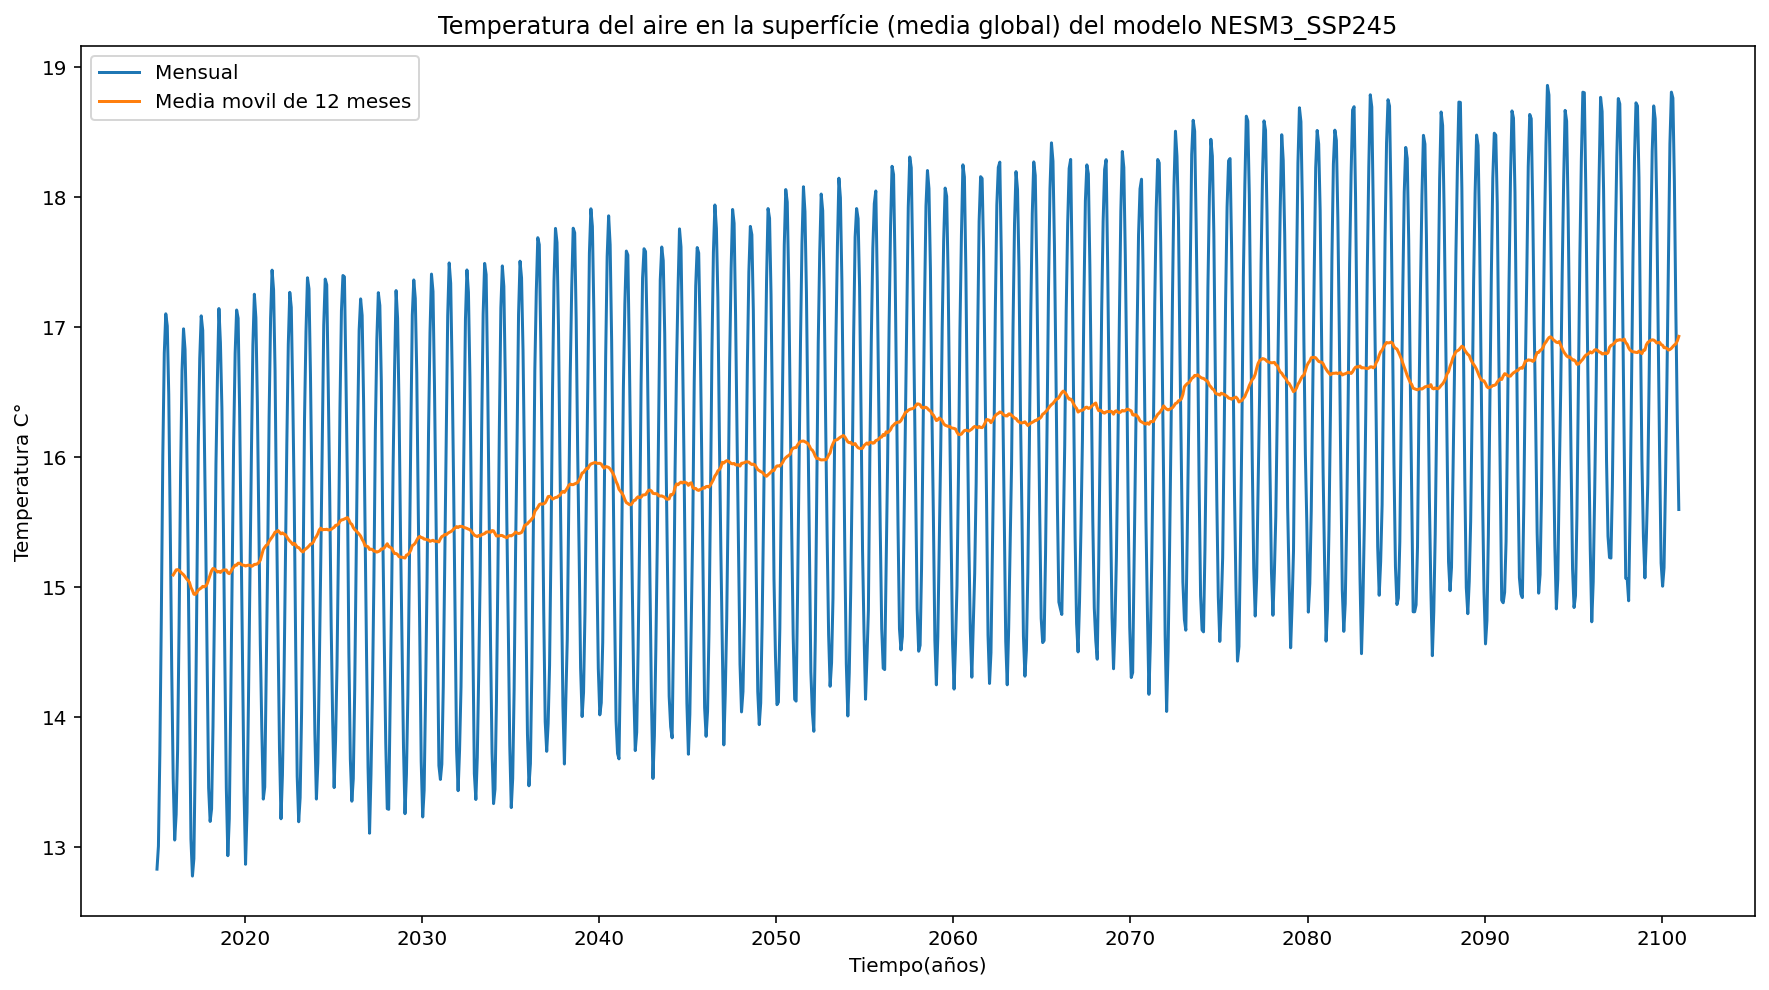

In [13]:
#sns.set_theme()
sns.set
G=global_mean(ds)-273
plt.figure(figsize=(15, 8))
Med12= G.rolling(time=12).mean()
plt.xlabel('Tiempo(años)')
plt.ylabel('Temperatura C°')
plt.title('Temperatura del aire en la superfície (media global) del modelo NESM3_SSP245')
plt.plot(G.time, G.tas,label='Mensual')
plt.plot(Med12.time, Med12.tas, label='Media movil de 12 meses')
plt.legend()
plt.savefig("Temperatura del aire en la superfície (media global) del modelo NESM3_SSP245.png")

### Pueden hacer el mismo experimento anterior usando los datos GFDL-ESM4  u otros Modelos

#### En este paso vamos a calcular series de tiempo con las data de los modelos 

In [14]:
def temperatura(mod):
  pd_tas_timeseries=mod.tas.to_pandas() # Transformando xarray para pandas
  tasm=pd_tas_timeseries.loc['1951-01':'1980-12'].mean() #Calculando la media de 1950 a 1980 
  return tasm # Temperatura média do modelo
def anomalias(mod):
  pd_tas_timeseries=mod.tas.to_pandas()
  pd_atas_timeseries=pd_tas_timeseries- temperatura(mod)
  ano=pd_atas_timeseries.resample("1y").median()
  yys=ano.reset_index()
  ys=yys[0] #separa la TAS
  tempo=yys['time'] #separa a data
  xx=tempo.to_list() #coloca en uma lista
  xs=np.int16([date.strftime("%Y") for date in xx]).tolist()
  plt.plot(xs, ys, label='NUIST')


In [15]:
NUIST_585=media12("experiment_id == 'ssp585' & source_id=='NESM3' & variable_id == 'tas'")
NUIST_hist=media12("experiment_id == 'historical' & source_id=='NESM3' & variable_id == 'tas'")
NUIST_126=media12("experiment_id == 'ssp126' & source_id=='NESM3' & variable_id == 'tas'")
NUIST_anomalia= temperatura(NUIST_hist)
#NUIST_anomalia

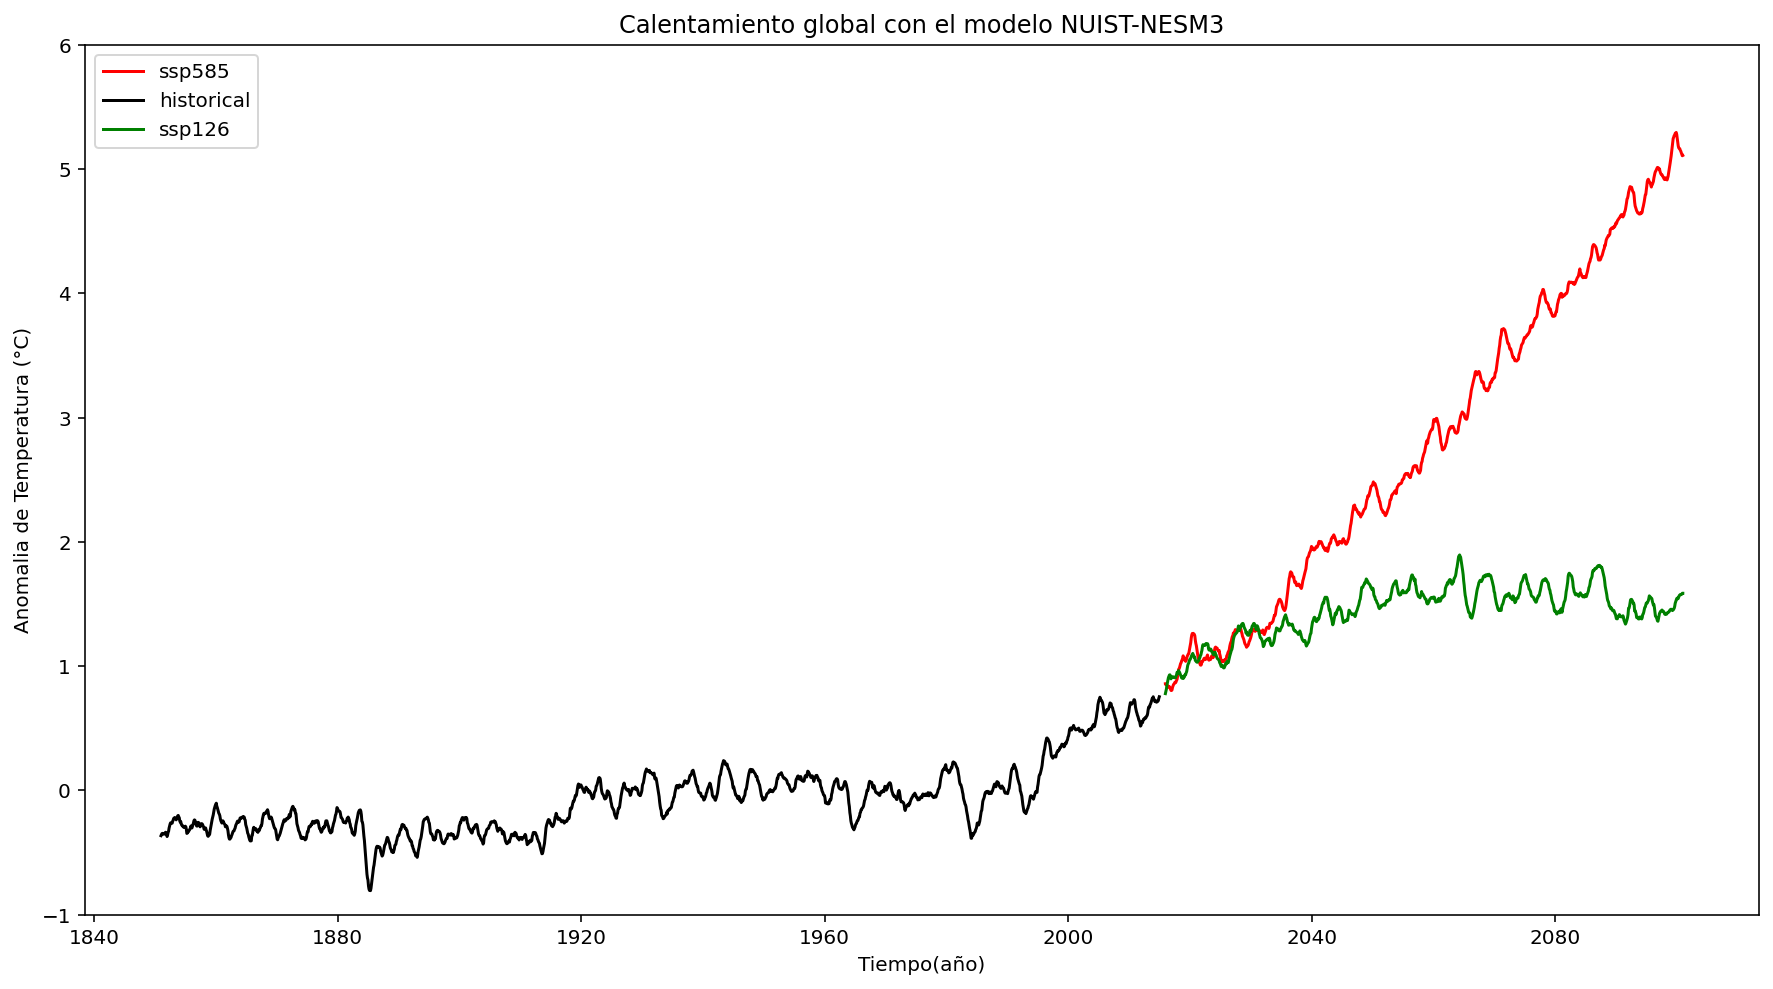

In [16]:
sns.set
plt.figure(figsize=(15, 8))
plt.ylim(-1, 6)
plt.plot(NUIST_585.time, NUIST_585.tas-NUIST_anomalia, label='ssp585', c='red')
plt.plot(NUIST_hist.time, NUIST_hist.tas-NUIST_anomalia, label='historical', c='black')
plt.plot(NUIST_126.time, NUIST_126.tas-NUIST_anomalia, label='ssp126',c='green')
#plt.axhline(0, color='gray', label='Media del periodo 1950-1980') 
plt.xlabel('Tiempo(año)')
plt.ylabel('Anomalia de Temperatura (°C)')
plt.title('Calentamiento global con el modelo NUIST-NESM3')
plt.legend(loc="upper left")
plt.savefig("Calentamiento global con el modelo NUIST-NESM3.png")

### Vamos hacer mapas de cambio de Temperatura con el modelo NESM3

In [17]:
historico=mapa("experiment_id == 'historical' & source_id=='NESM3' & variable_id == 'tas'")
alto=mapa("experiment_id == 'ssp585' & source_id=='NESM3' & variable_id == 'tas'")

/Users/climatecentre/opt/anaconda3/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


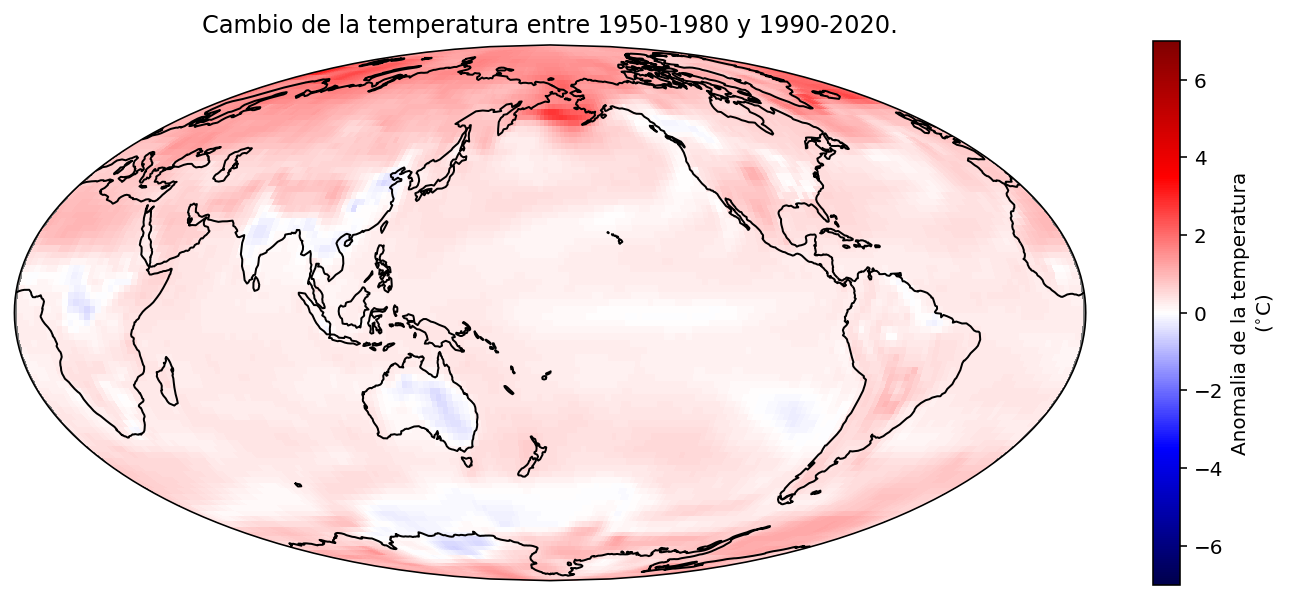

In [18]:
#Calculamos el cambio de temperatura entre los periodos de 1950-1980 y 1990 -2020

temperature_change =historico['tas'].sel(time=slice('1990','2020')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de la temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-2, vmax=12, center=-5  )
p.axes.set_global()
p.axes.coastlines()
plt.title('Cambio de la temperatura entre 1950-1980 y 1990-2020.')
plt.savefig("Cambio de la temperatura entre 1950-1980 y 1990-2020.png")

/Users/climatecentre/opt/anaconda3/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


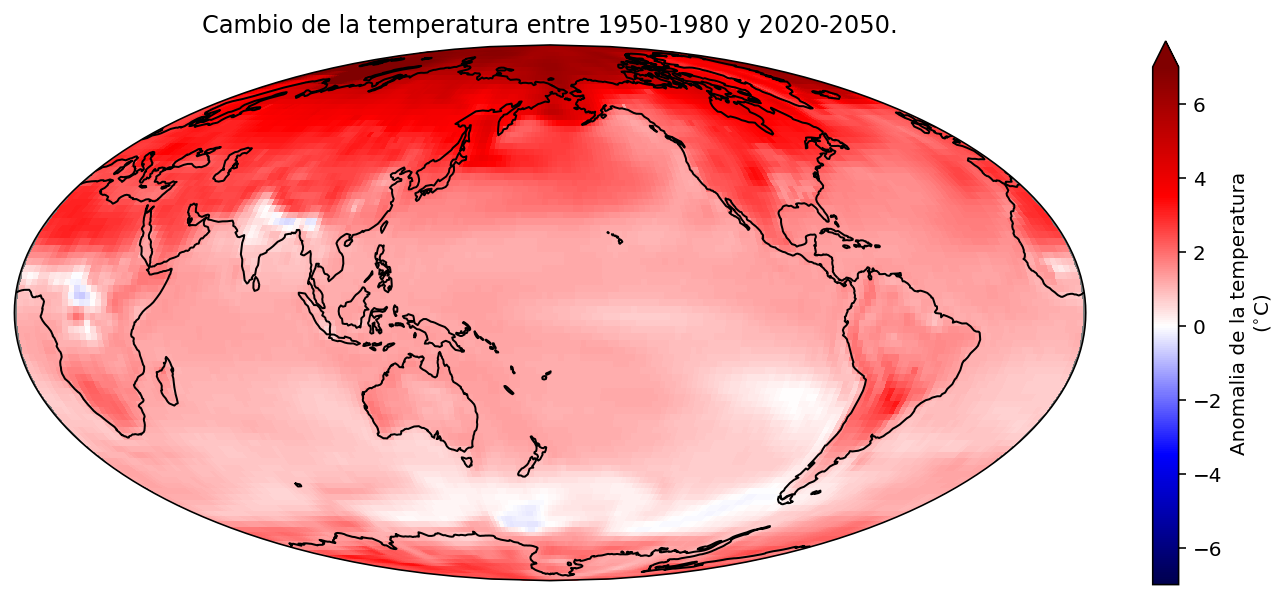

In [19]:
#Calculamos el cambio de temperatura entre los periodos de 1950-1980 y 2020 -2050

temperature_change =alto['tas'].sel(time=slice('2020','2050')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de la temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-2, vmax=12, center=-5)
p.axes.set_global()
p.axes.coastlines()
plt.title('Cambio de la temperatura entre 1950-1980 y 2020-2050.')
plt.savefig("Cambio de la temperatura entre 1950-1980 y 2020-2050.png")

/Users/climatecentre/opt/anaconda3/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


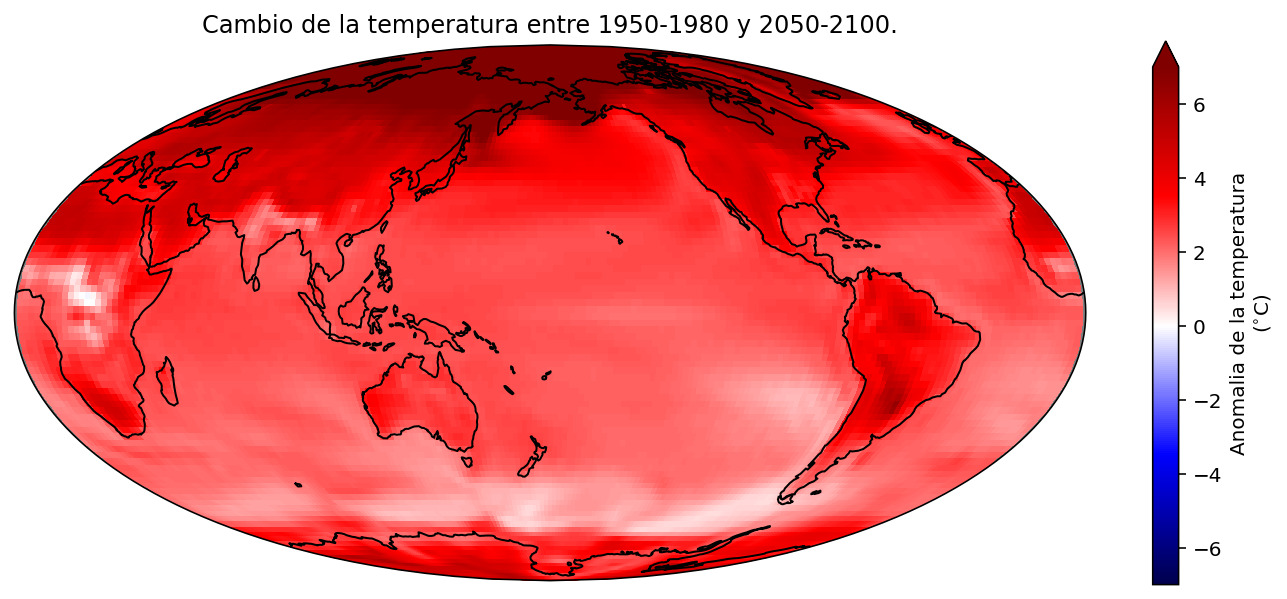

In [20]:
#Calculamos el cambio de temperatura entre los periodos de 1950-1980 y 2050 -2100

temperature_change =alto['tas'].sel(time=slice('2050','2080')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de la temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-2, vmax=12, center=-5)
#coolwarm,
p.axes.set_global()
p.axes.coastlines()
plt.title('Cambio de la temperatura entre 1950-1980 y 2050-2100.')
plt.savefig("Cambio de la temperatura entre 1950-1980 y 2050-2100.png")

/Users/climatecentre/opt/anaconda3/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


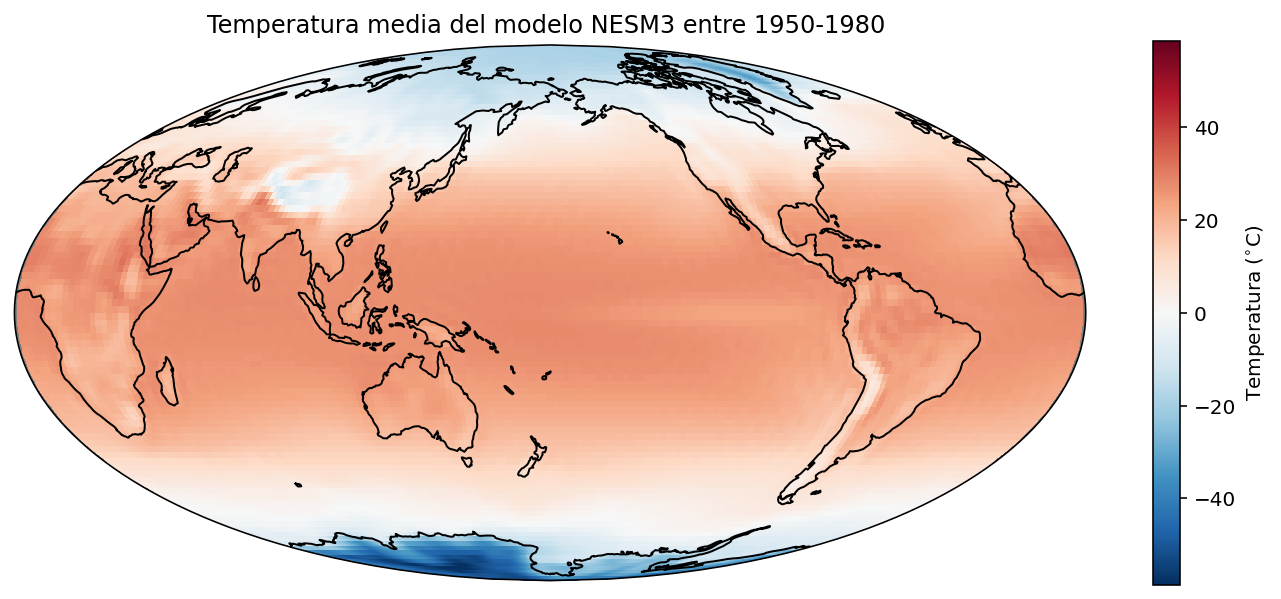

In [21]:
temperature_change = historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')-273

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(12, 5))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=180.0), facecolor="gray"),
    transform=ccrs.PlateCarree())
p.axes.set_global()
p.axes.coastlines()
plt.title('Temperatura media del modelo NESM3 entre 1950-1980 ')
plt.savefig("Temperatura media del modelo NESM3 entre 1950-1980.png")

## Comparación entre "Sudamérica" y el resto del mundo

In [22]:
historico=mapa("experiment_id == 'historical' & source_id=='NESM3' & variable_id == 'tas'")
alto=mapa("experiment_id == 'ssp245' & source_id == 'NESM3' & variable_id == 'tas'")
G=america12(historico)
H=america12(alto)
pd_tas_timeseries=G.to_pandas() # Transformando xarray para pandas
tasm=pd_tas_timeseries.loc['1951-01':'1980-12'].mean()

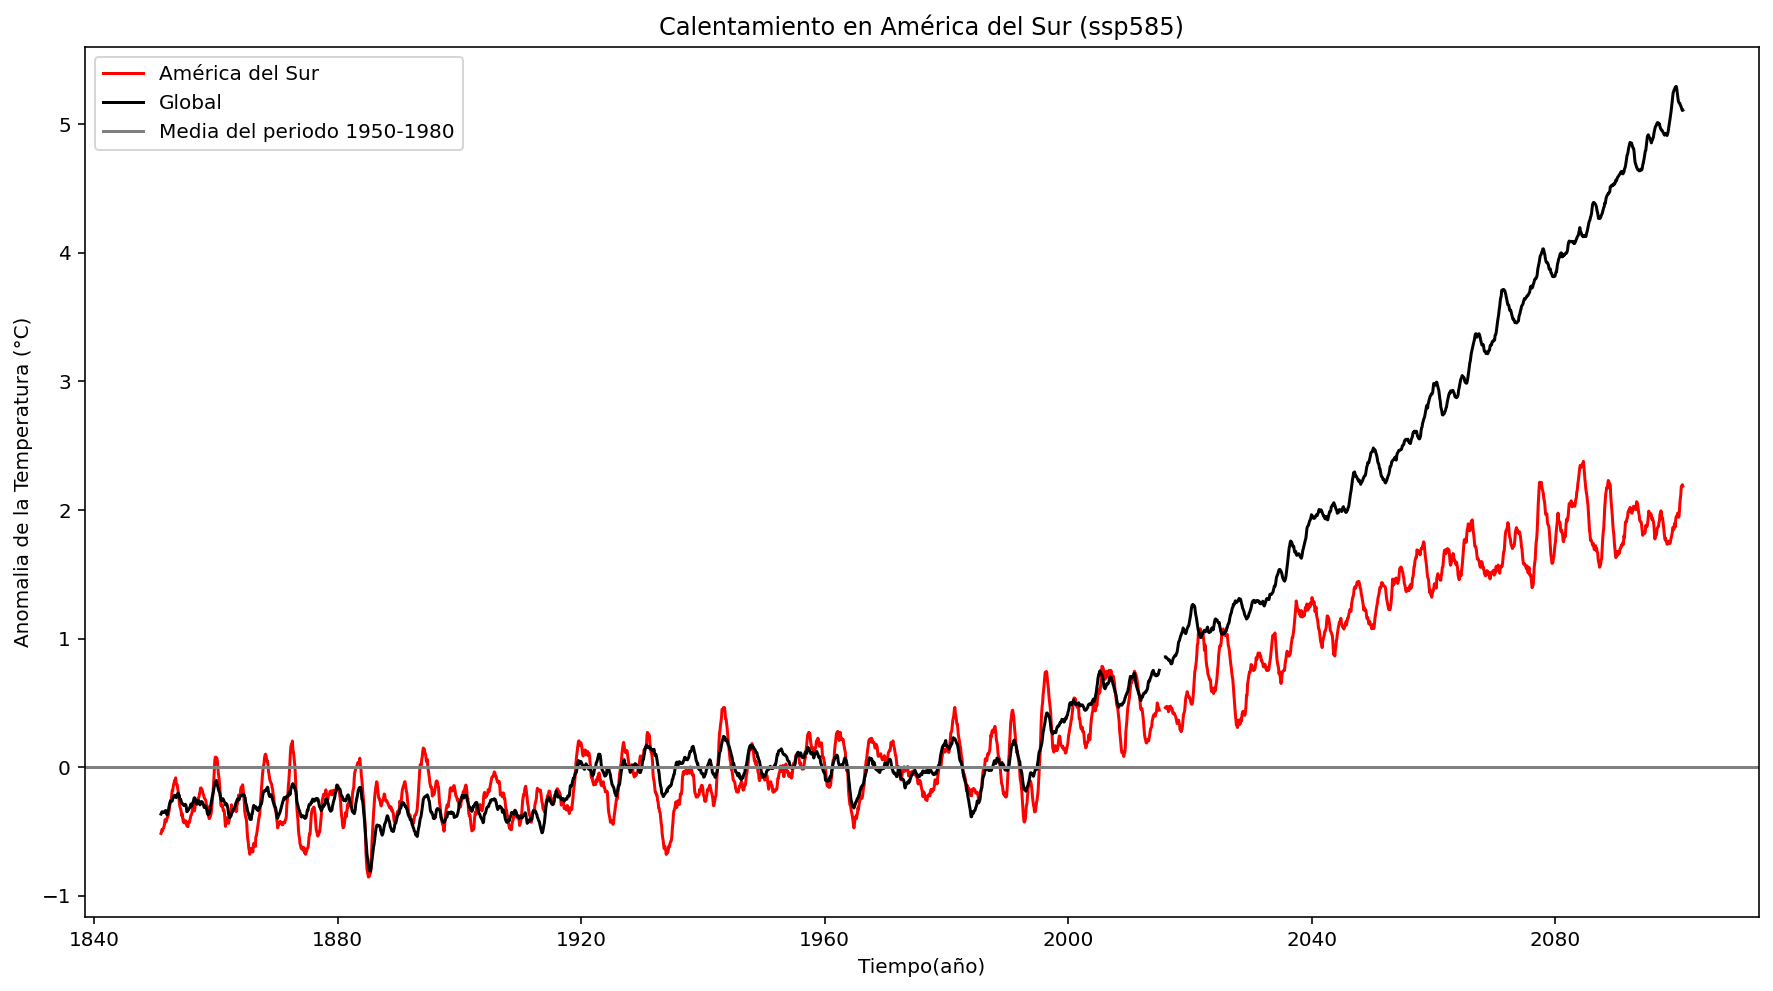

In [23]:
plt.figure(figsize=(15, 8))
plt.plot(G.time, G.values-tasm, label='América del Sur', c='red')
plt.plot(H.time, H.values-tasm, c='red')
plt.plot(NUIST_585.time, NUIST_585.tas-NUIST_anomalia, c='black')
plt.plot(NUIST_hist.time, NUIST_hist.tas-NUIST_anomalia, label='Global', c='black')
plt.axhline(0, color='gray', label='Media del periodo 1950-1980') 
plt.title('Calentamiento en América del Sur (ssp585)')
plt.xlabel('Tiempo(año)')
plt.ylabel('Anomalia de la Temperatura (°C)');
plt.legend()
plt.savefig("Calentamiento en América del Sur (ssp585).png")

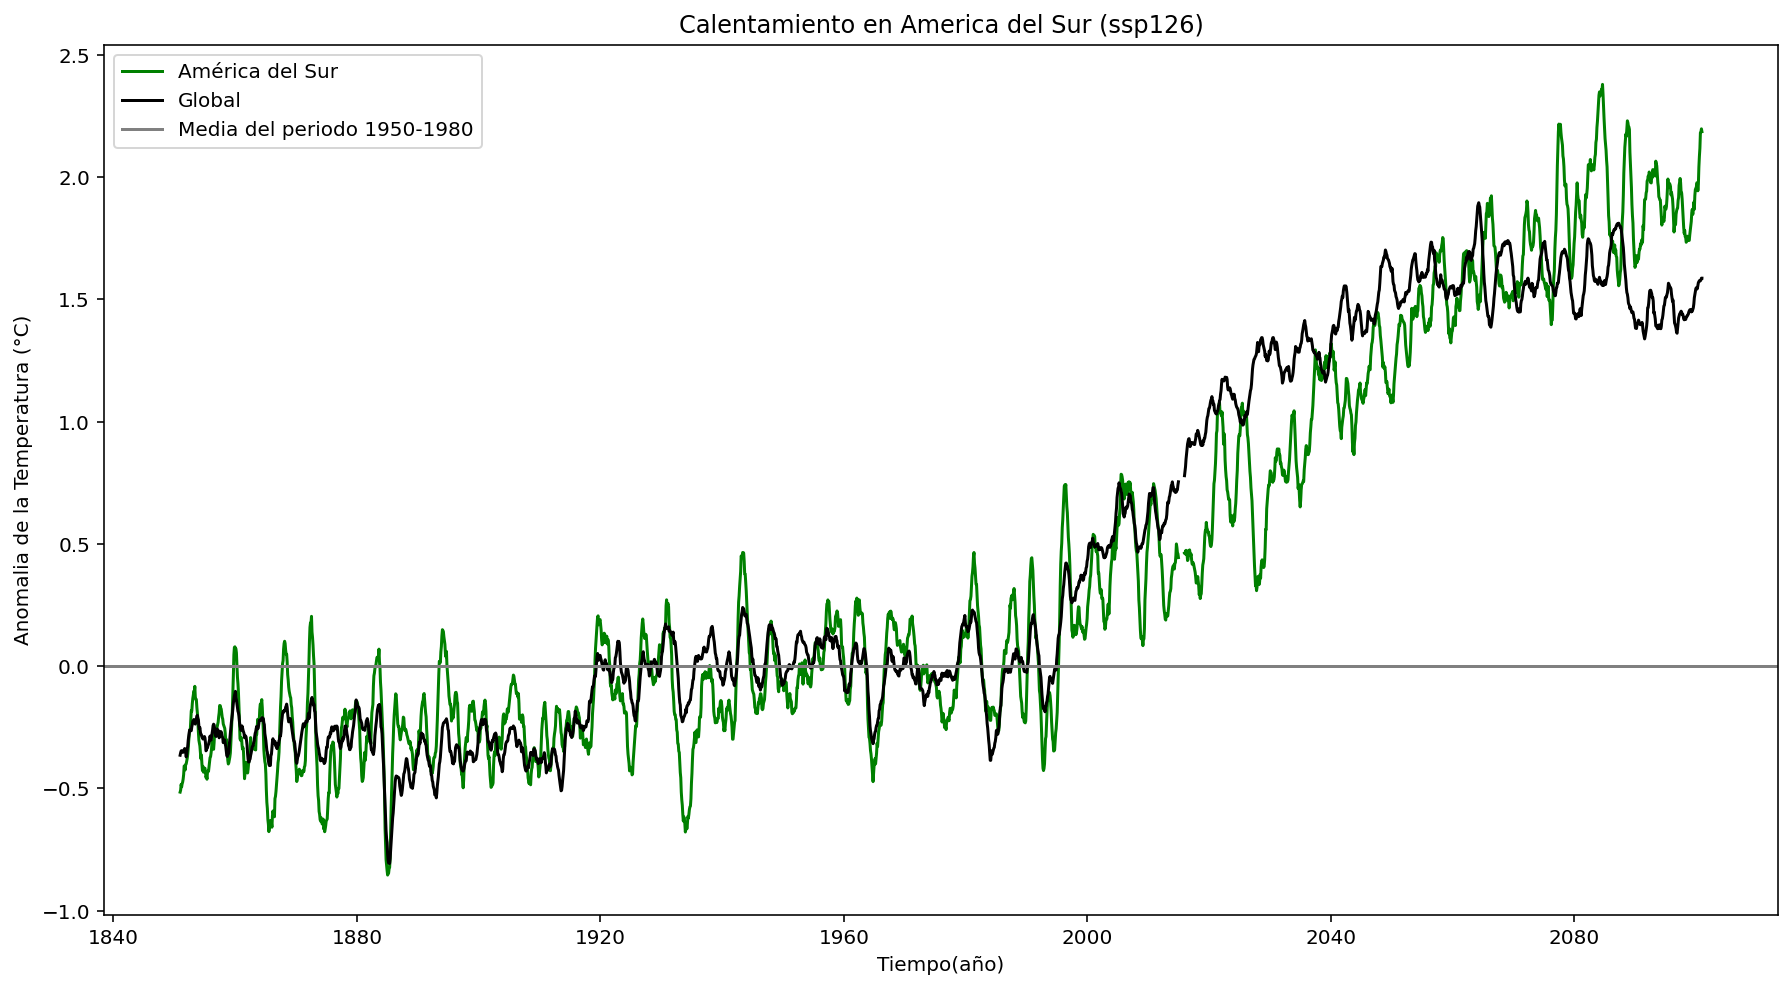

In [24]:
plt.figure(figsize=(15, 8))
plt.plot(G.time, G.values-tasm, label='América del Sur', c='green')
plt.plot(H.time, H.values-tasm, c='green')
plt.plot(NUIST_126.time, NUIST_126.tas-NUIST_anomalia, c='black')
plt.plot(NUIST_hist.time, NUIST_hist.tas-NUIST_anomalia, label='Global', c='black')
plt.axhline(0, color='gray', label='Media del periodo 1950-1980') 
plt.title('Calentamiento en America del Sur (ssp126)')
plt.xlabel('Tiempo(año)')
plt.ylabel('Anomalia de la Temperatura (°C)');
plt.legend()
plt.savefig("Calentamiento en América del Sur (ssp126).png")

/Users/climatecentre/opt/anaconda3/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


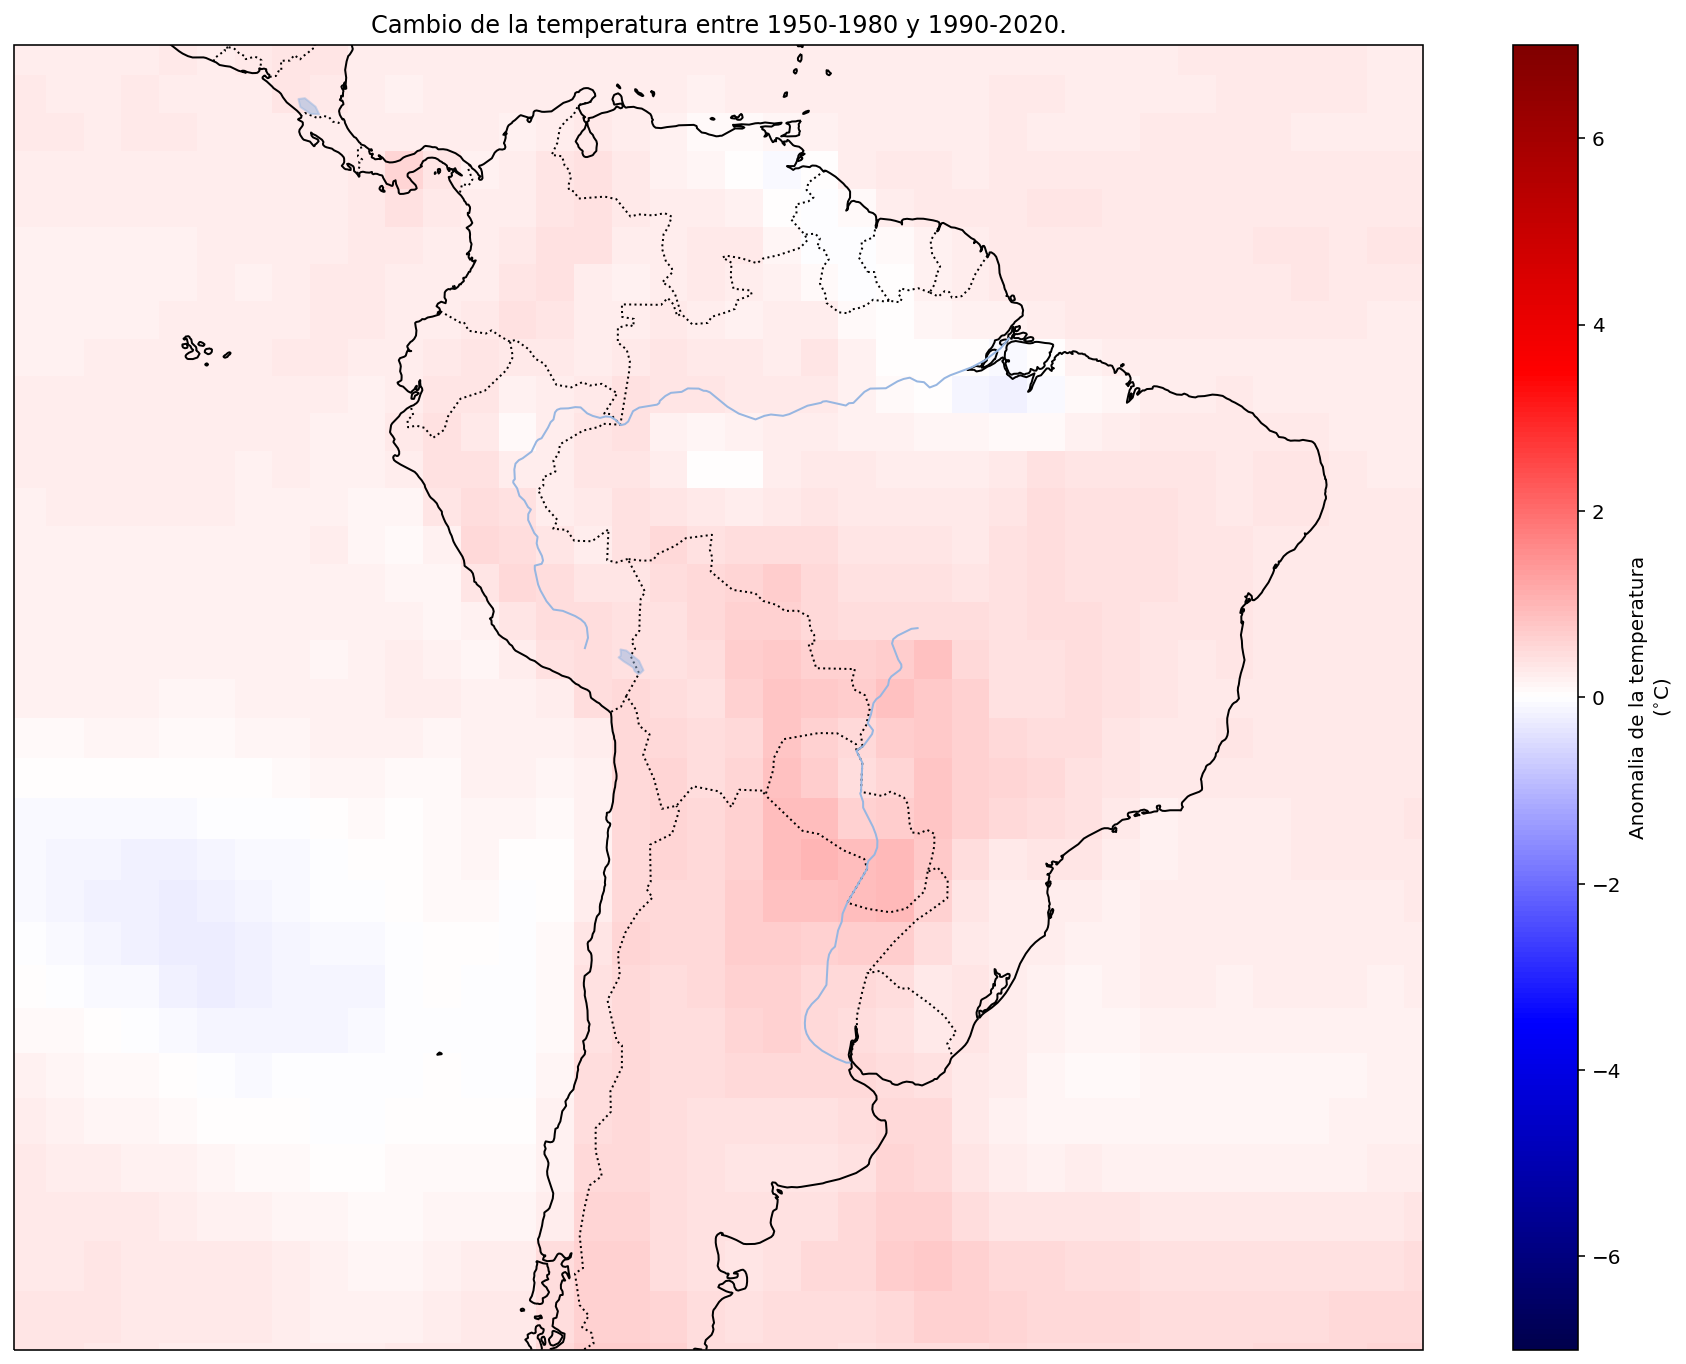

In [25]:
#Calculamos el cambio de temperatura entre los periodos de 1950-1980 y 1990 -2020

import cartopy.crs as ccrs
import cartopy.feature as cfeature

central_lon, central_lat = -60, -45
extent = [-100, -30, 12, -75.5]

temperature_change =historico['tas'].sel(time=slice('1990','2020')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de la temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(16, 12))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mercator(central_lon, central_lat), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-2, vmax=12, center=-5  )
p.axes.set_extent(extent)
#p.axes.set_global()
p.axes.coastlines(resolution='50m')
p.axes.add_feature(cfeature.BORDERS, linestyle=':')
p.axes.add_feature(cfeature.LAKES, alpha=0.5)
p.axes.add_feature(cfeature.RIVERS)
plt.title('Cambio de la temperatura entre 1950-1980 y 1990-2020.')
plt.savefig("Cambio de la temperatura entre 1950-1980 y 1990-2020_Americasur.png")

/Users/climatecentre/opt/anaconda3/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


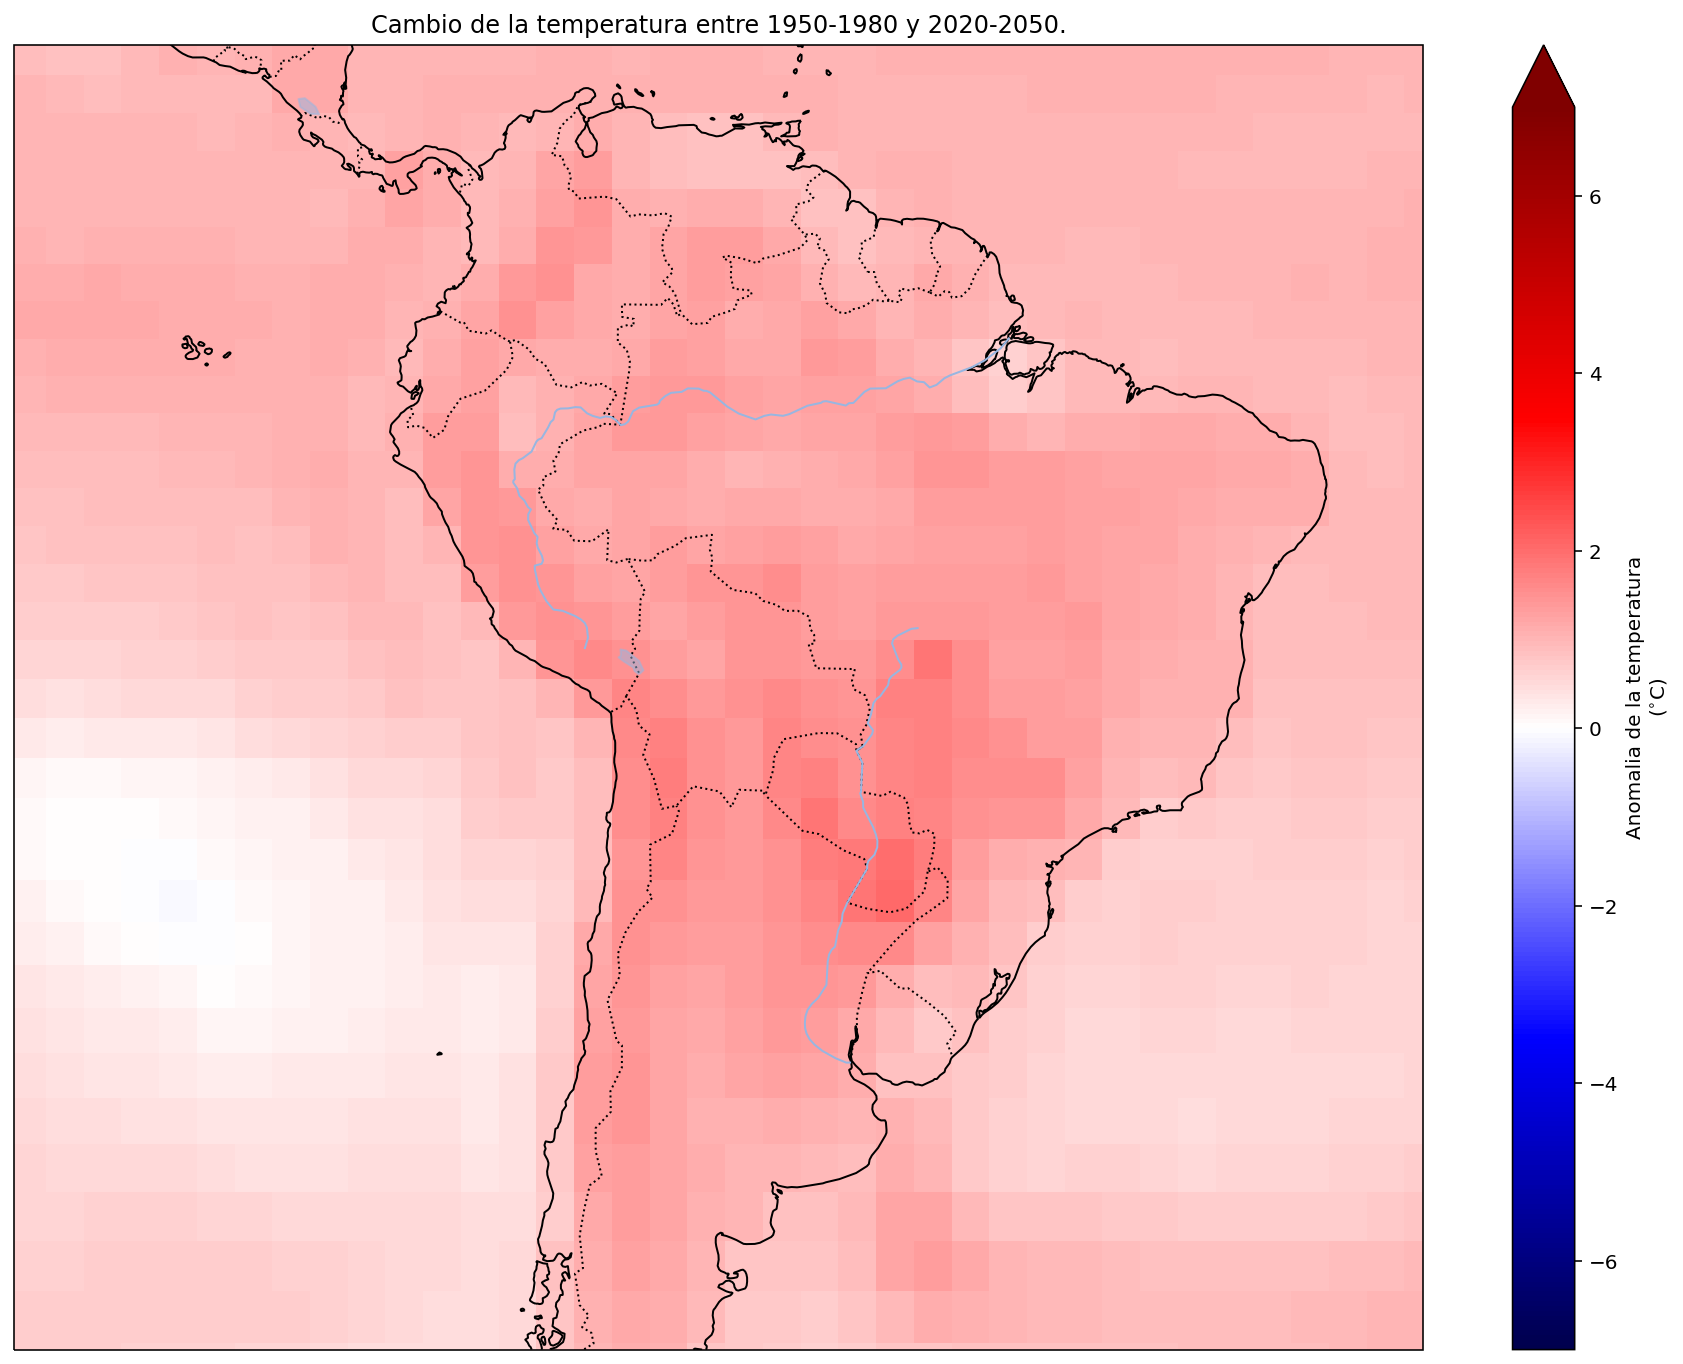

In [26]:
#Calculamos el cambio de temperatura entre los periodos de 1950-1980 y 2020 -2050

central_lon, central_lat = -60, -45
extent = [-100, -30, 12, -75.5]

temperature_change =alto['tas'].sel(time=slice('2020','2050')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de la temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(16, 12))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mercator(central_lon, central_lat), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-2, vmax=12, center=-5)
p.axes.set_extent(extent)
#p.axes.set_global()
p.axes.coastlines(resolution='50m')
p.axes.add_feature(cfeature.BORDERS, linestyle=':')
p.axes.add_feature(cfeature.LAKES, alpha=0.5)
p.axes.add_feature(cfeature.RIVERS)
plt.title('Cambio de la temperatura entre 1950-1980 y 2020-2050.')
plt.savefig("Cambio de la temperatura entre 11950-1980 y 2020-2050_Americasur.png")

/Users/climatecentre/opt/anaconda3/lib/python3.8/site-packages/xarray/plot/utils.py:444: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


Text(0.5, 1.0, 'Cambio de la temperatura entre 1950-1980 y 2050-2100.')

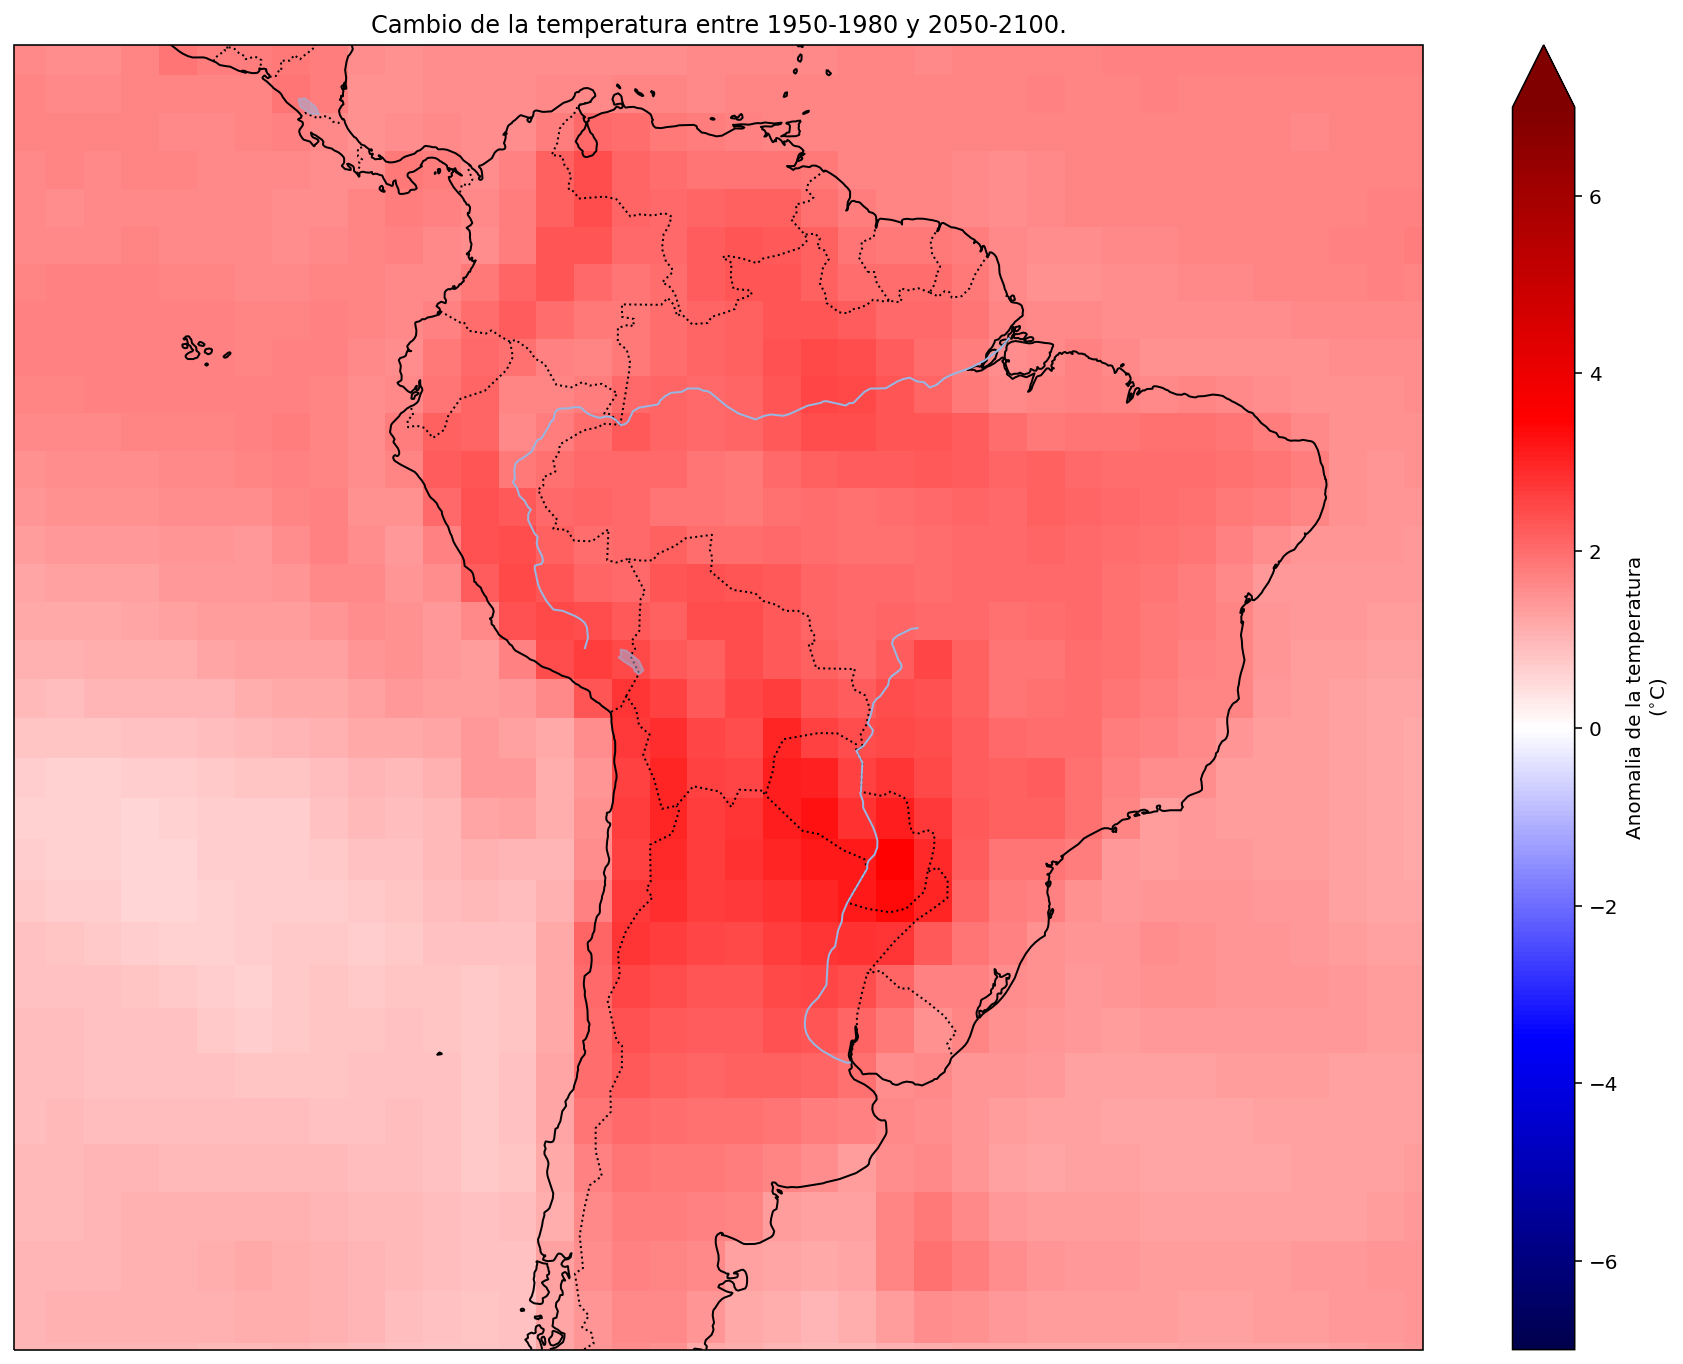

In [28]:
#Calculamos el cambio de temperatura entre los periodos de 1950-1980 y 2050 -2100

central_lon, central_lat = -60, -45
extent = [-100, -30, 12, -75.5]

temperature_change =alto['tas'].sel(time=slice('2050','2080')).mean(dim='time') -   historico['tas'].sel(time=slice('1950','1980')).mean(dim='time')

temperature_change.attrs.update(ds.attrs)
temperature_change = temperature_change.rename(
    r'Anomalia de la temperatura ($^{\circ}$C)'
)
fig = plt.figure(figsize=(16, 12))
p=temperature_change.squeeze().plot(subplot_kws=dict(projection=ccrs.Mercator(central_lon, central_lat), facecolor="gray"),
    transform=ccrs.PlateCarree(), cmap='seismic',
           vmin=-2, vmax=12, center=-5)
p.axes.set_extent(extent)
#coolwarm,
#p.axes.set_global()
p.axes.coastlines(resolution='50m')
p.axes.add_feature(cfeature.BORDERS, linestyle=':')
p.axes.add_feature(cfeature.LAKES, alpha=0.5)
p.axes.add_feature(cfeature.RIVERS)
plt.title('Cambio de la temperatura entre 1950-1980 y 2050-2100.')
#plt.savefig("Cambio de la temperatura entre 1950-1980 y 2050-2100_Americasur.png")
